## Introduction

blah blah blah

## What is ARM and How Does It Work?

blah blah blah

## Methods

blah blah blah

In [7]:
# Import relevant packages
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from apyori import apriori
import networkx as nx 
import pandas as pd
import numpy as np
import nltk
import os
import re
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


In [8]:
### ADAPTED FROM NYCT-Tweet-Cleaning.py in the 02-data-cleaning FOLDER ###
# Import NYCT Tweet Data Set and Combine all separate searches
nyct_base = pd.read_csv("../../data/00-raw-data/NYCTSubway-Tweets-0901-0914.csv",index_col=0,encoding="unicode_escape")
### COMBINE DATAFRAMES AND SAVE ###
base_path = os.listdir("../../data/00-raw-data")
nyct = pd.DataFrame(columns=nyct_base.columns)
for f in base_path:
    if f.startswith('NYCTSubway'):
        new_df = pd.read_csv("../../data/00-raw-data/"+ f,index_col=0,encoding="unicode_escape")
        nyct = pd.concat([nyct,new_df],axis=0)
#print(nyct.head())
# Convert text of tweets to list
tweets = nyct['text'].tolist()
# Remove urls from text
tweets = [re.sub(r'http\S+', '', x) for x in tweets]

### PROCESSING FOR LINE LETTERS ###
tweets = [tweet.replace('/',' ') for tweet in tweets]
tweets_one_mod = []
subway_line_list = ['1','2','3','4','5','6','7','A','B','C','D','E','F','G','J','L','M','N','Q','R','S','W','Z']
# Remove all words in tweet with length greater than 1
for tweet in tweets:
    word_list = tweet.split(" ")
    new_words = [word for word in word_list if len(word)==1]
    # Filter out lower case letters
    new_words = [word for word in new_words if word.isupper() or word.isnumeric()]
    # Filter out invalid letters/numbers (ones that are not subway lines)
    new_words = [word for word in new_words if word in subway_line_list]
    new_word_str = ' '.join(new_words)
    tweets_one_mod.append(new_word_str)
# Remove empty strings
tweets_one_mod = [tweet for tweet in tweets_one_mod if tweet]
tweets_split = []
for tweet in tweets_one_mod:
    tweets_split.append(tweet.split())
# Remove duplicated elements within tweets
new_splits = []
for tweet in tweets_split:
    new_split = []
    for char in tweet:
        if char not in new_split:
            new_split.append(char)
    new_splits.append(new_split)
# Transactions is the final data set
transactions = new_splits
for i in range(1,20):
    print(transactions[i])

['D', 'N', 'R']
['1']
['A']
['1']
['6']
['2', '5']
['A']
['2', '5', '3', 'E']
['6']
['B', 'Q']
['B', 'Q']
['6']
['6']
['E']
['E']
['R', 'W']
['R', 'W']
['A', 'W']
['E']


In [9]:
# Adapted from lab-6.1, code adapted from Dr. Nakul's lab section and self created.
# Reformat output of results to a more digestible format
def reformat(results):
    outcome = []
    # Iterate over results
    for i in range(0,len(results)):
        for j in range(0,len(list(results[i]))):
            if j>1:
                for k in range(0,len(list(results[i][j]))):
                    if len(list(results[i][j][k][0]))!=0:
                        rhs = list(results[i][j][k][0])
                        lhs = list(results[i][j][k][1])
                        conf = float(results[i][j][k][2])
                        lift = float(results[i][j][k][3])
                        outcome.append([rhs,lhs,supp,conf,supp*conf,lift])
            if j==1:
                supp = results[i][j]
    return pd.DataFrame(outcome, columns=['rhs','lhs','supp','conf','supp x conf','lift'])

# Adapted from lab-6.1, code adapted from Dr. Nakul's lab section
def convert_to_network(df):
    #print(df)

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)

    # print(G.nodes)
    # print(G.edges)
    return G

def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)

    #assign colors based on attributes
    weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e 	= [cmap(G[u][v]['weight']*10) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    edgecolors="black",
    edge_color=colors_e,
    node_size=2000,
    linewidths=2,
    font_size=8,
    font_color="white",
    font_weight="bold",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set(title='@NYCTSubway Tweet Subway Line Number/Letter Associations')
    plt.savefig("../../501-project-website/images/ARM-NetworkPlot.png")
    plt.show()


In [10]:
# INSERT CODE TO TRAIN THE ARM MODEL USING THE "apriori" PACKAGE
results = list(apriori(transactions,min_support=0.0125,min_confidence=0.0125,min_length=1,max_length=10))

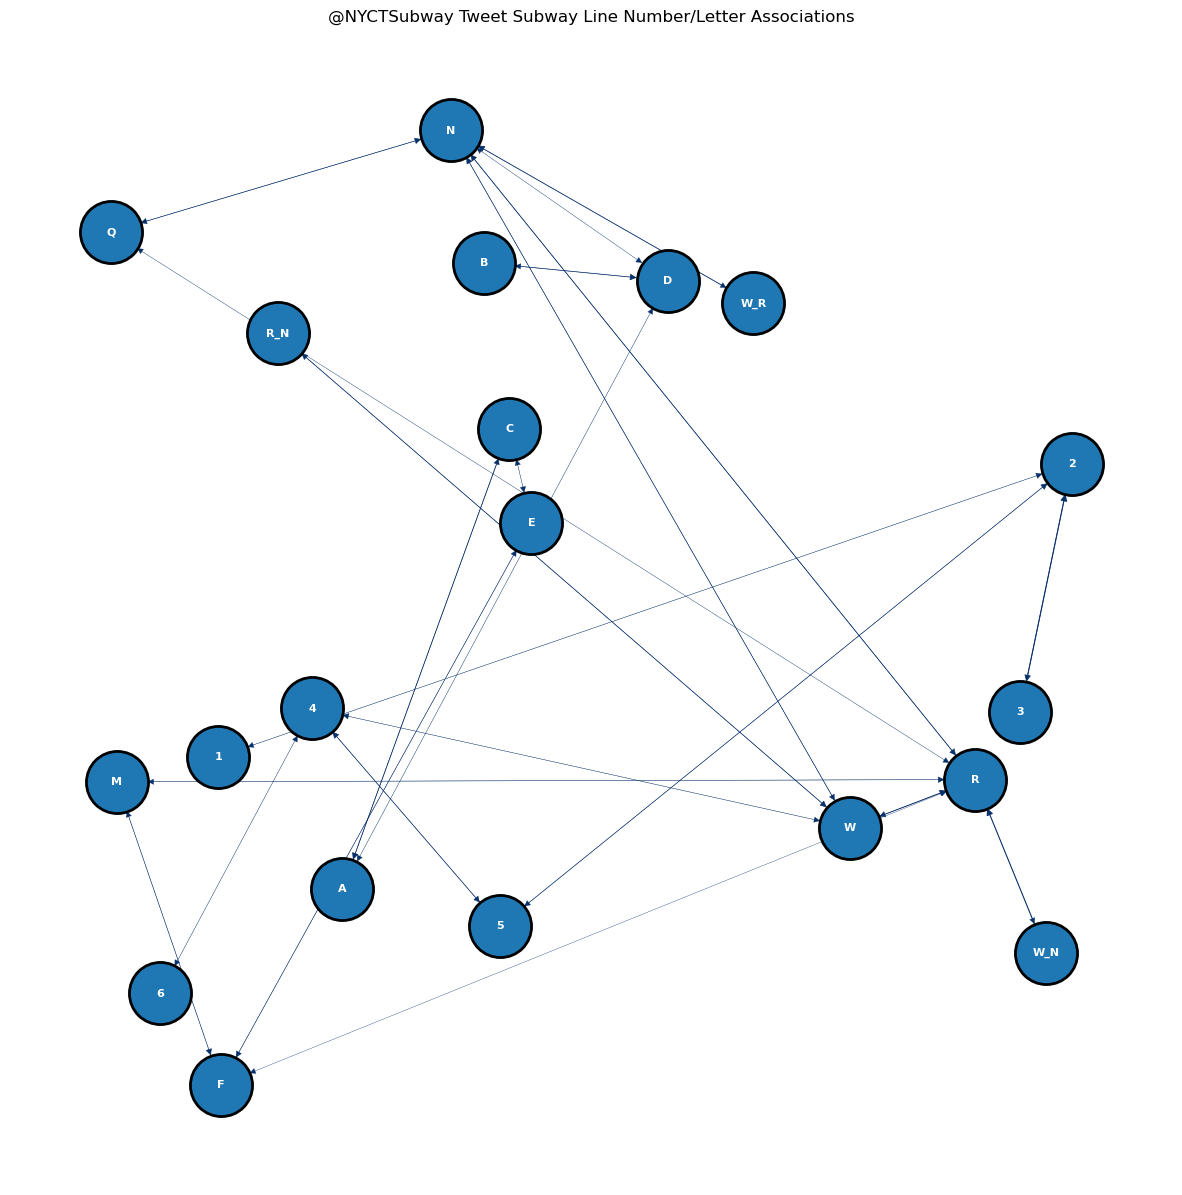

In [11]:
# INSERT CODE TO PLOT THE RESULTS AS A NETWORK-X OBJECT 
df_results = reformat(results)
G = convert_to_network(df_results)
plot_network(G)

## Results

blah blah blah